# Exploratory Data Analysis
The function of this notebook is for inital combining of data files and exploratory data analysis around what we are working with. 

## Packages

In [1]:
# System
import os

# Data manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preferences
pd.options.display.max_columns=None
pd.options.display.max_rows=None

## Raw data

In [2]:
# Read in the raw data
raw_data = pd.read_excel('../data/01_raw/Simulated Caregiving - Easy v Demanding.xlsx', sheet_name=None)
data = raw_data.copy()

# Merge all the sheets into a single dataframe and add sheet name as the "sessionæ variable
all_data = pd.DataFrame()
for k in data.keys():
    temp_df = data.get(k)
    temp_df['session'] = k
    all_data = pd.concat([all_data, temp_df])

# Relabel the cols for easier handling
all_data.columns = ['condition', 'interval_number', 'percent_interval_w_care', 'session', 
                   'percent_interval_w_care_easy', 'percent_interval_w_care_demanding']
    
# Reorganize the cols logically
all_data = all_data[[
    'session', 'condition', 'interval_number', 'percent_interval_w_care',
    'percent_interval_w_care_easy', 'percent_interval_w_care_demanding'
]].reset_index(drop=True)

all_data.sample(5)

,session,condition,interval_number,percent_interval_w_care,percent_interval_w_care_easy,percent_interval_w_care_demanding
341,FA2018-12,Easy,11,10.0,NaN,NaN
85,SP2018-4,Easy,14,20.0,NaN,NaN
159,FA2018-4,Easy,13,10.0,NaN,NaN
273,FA2018-9,Easy,6,15.0,NaN,NaN
47,SP2018-2,Demanding,24,55.0,NaN,NaN


In [3]:
# Merge the easy and demanding cols into the percent_interval_w_care col

# Modify missing vals so we can do the math
all_data = all_data.fillna(-1)

new_vals = []
for i in range(len(all_data)):
    percent = all_data['percent_interval_w_care'][i]
    if percent==-1:
        percent = all_data['percent_interval_w_care_easy'][i] + all_data['percent_interval_w_care_demanding'][i]
        if (all_data['percent_interval_w_care_easy'][i]<0) | (all_data['percent_interval_w_care_demanding'][i]<0):
            percent+=1
        new_vals.append(percent)
    else:
        new_vals.append(percent)
all_data['percent_interval_w_care'] = new_vals

# Return missing vals to missing
all_data = all_data.replace(-1, np.nan)

# Take a peek
all_data

,session,condition,interval_number,percent_interval_w_care,percent_interval_w_care_easy,percent_interval_w_care_demanding
0,SP2018-1,Easy,1,95.0,NaN,NaN
1,SP2018-1,Easy,2,5.0,NaN,NaN
2,SP2018-1,Easy,3,85.0,NaN,NaN
3,SP2018-1,Easy,4,20.0,NaN,NaN
4,SP2018-1,Easy,5,70.0,NaN,NaN
5,SP2018-1,Easy,6,35.0,NaN,NaN
6,SP2018-1,Demanding,7,35.0,NaN,NaN
7,SP2018-1,Demanding,8,30.0,NaN,NaN
8,SP2018-1,Demanding,9,15.0,NaN,NaN
9,SP2018-1,Demanding,10,30.0,NaN,NaN


### Simple comparison of easy versus demanding

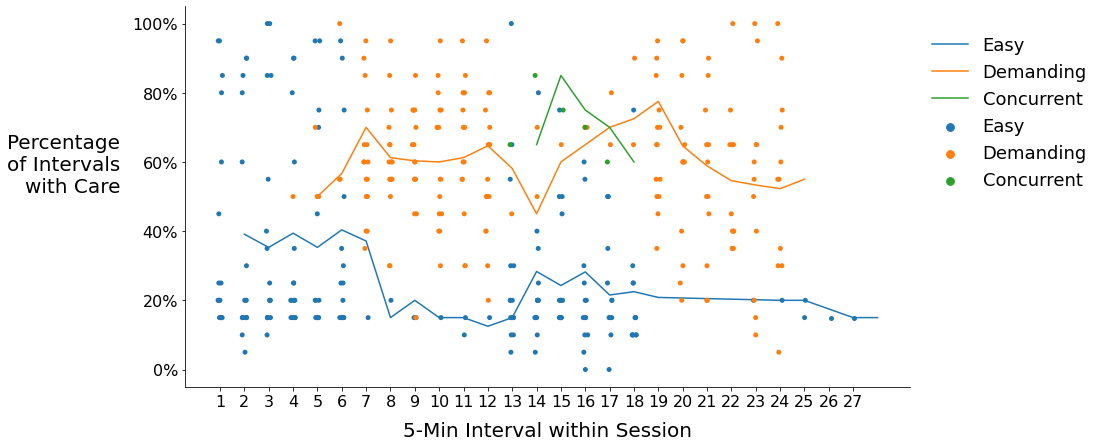

In [4]:
sns.color_palette("viridis")
fig, ax = plt.subplots(figsize=(13, 7))
sns.stripplot(
    x='interval_number', 
    y='percent_interval_w_care', 
    data=all_data.sort_values(by=['condition'], ascending=False), 
    hue='condition', 
)
grouped_data = all_data[['condition', 'interval_number', 'percent_interval_w_care']].\
                groupby(['condition', 'interval_number'])['percent_interval_w_care'].mean().\
                reset_index().sort_values(by='condition', ascending=False).reset_index(drop=True)
sns.lineplot(
    x='interval_number', 
    y='percent_interval_w_care', 
    data=grouped_data, 
    hue='condition', 
)
plt.ylabel("Percentage\nof Intervals\nwith Care", fontsize=20, rotation=0, ha="right", labelpad=12)
ticks = range(0, 101, 20)
labels = [str(tick)+"%" for tick in ticks]
plt.yticks(ticks=ticks, labels=labels, fontsize=16)
plt.xlabel("5-Min Interval within Session", fontsize=20, labelpad=12)
plt.xticks(fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc=(1.02, 0.5), frameon=False, fontsize=18)
plt.show()